In [1]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.3.0


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

In [3]:
img_width = 64
img_height = 64 

# Building my Model

In [4]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)

In [5]:
train_data_generator = datagen.flow_from_directory(directory = '../cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16, 
                                                   subset = 'training'
)

Found 22048 images belonging to 2 classes.


In [6]:
validation_data_generator = datagen.flow_from_directory(directory = '../cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16, 
                                                   subset = 'validation'
)

Found 5510 images belonging to 2 classes.


In [16]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width,img_height,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Ten Epochs

In [11]:
ten_epoch = model.fit_generator(generator = train_data_generator,
                                  steps_per_epoch = len(train_data_generator),
                                  epochs = 10,
                                  validation_data = validation_data_generator,
                                  validation_steps = len(validation_data_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1378/1378 [==============================] - 142s 103ms/step - loss: 0.5840 - accuracy: 0.6857 - val_loss: 0.3274 - val_accuracy: 0.9064
Epoch 2/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.2578 - accuracy: 0.9150 - val_loss: 0.2128 - val_accuracy: 0.9263
Epoch 3/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.1936 - accuracy: 0.9397 - val_loss: 0.1769 - val_accuracy: 0.9401
Epoch 4/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.1762 - accuracy: 0.9466 - val_loss: 0.1623 - val_accuracy: 0.9452
Epoch 5/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.1627 - accuracy: 0.9497 - val_loss: 0.1589 - val_accuracy: 0.9412
Epoch 6/10
1378/1378 [==============================] - 31s 23ms/step - loss: 0.1505 - accuracy: 0.9530 - val_loss: 0.2142 - val_accuracy: 0.9229
Epoch 7/10
1378/1378 [========================

In [12]:
ten_epoch.history

{'loss': [0.5840131044387817,
  0.2578272223472595,
  0.19358856976032257,
  0.17624399065971375,
  0.16274358332157135,
  0.1505022495985031,
  0.14256049692630768,
  0.14000917971134186,
  0.1329454481601715,
  0.12831486761569977],
 'accuracy': [0.6857311129570007,
  0.9150489568710327,
  0.9396770596504211,
  0.9466164708137512,
  0.9497460126876831,
  0.9530116319656372,
  0.9551886916160583,
  0.9558236598968506,
  0.9566400647163391,
  0.9588171243667603],
 'val_loss': [0.3273768424987793,
  0.2127726972103119,
  0.17690183222293854,
  0.16228093206882477,
  0.1588805466890335,
  0.21420754492282867,
  0.18647150695323944,
  0.1711050122976303,
  0.180368572473526,
  0.22825799882411957],
 'val_accuracy': [0.9063521027565002,
  0.9263157844543457,
  0.9401088953018188,
  0.9451905488967896,
  0.9411978125572205,
  0.9228675365447998,
  0.9357531666755676,
  0.9415608048439026,
  0.9417423009872437,
  0.934482753276825]}

# Plotting the Learning Curve

In [13]:
def plot_learningCurve(model, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, model.history['accuracy'])
  plt.plot(epoch_range, model.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, model.history['loss'])
  plt.plot(epoch_range, model.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

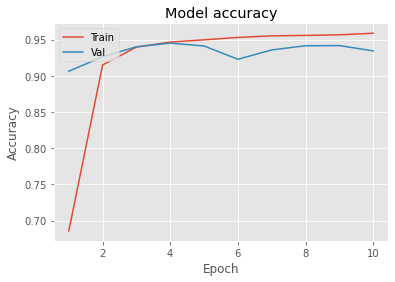

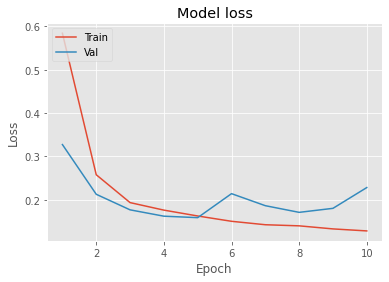

In [14]:
plot_learningCurve(ten_epoch, 10)